In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import wilcoxon
from scipy.signal import find_peaks
import os
import pandas as pd   
import seaborn as sns

In [2]:
# experiment 1 data collection cell
def process_file(path_to_file):
    data = []
    with open(path_to_file, "r") as my_file:
        for i,line in enumerate(my_file):
            if i < 2:
                continue
            datas = line.split() 
            data.append(datas) 
                        #     
    data = np.array(data, dtype=float)
    grad = np.diff(data[:,0],prepend = 0)
    requered_width = 1

    return data[grad > requered_width][:,1].tolist(), data[grad > requered_width][:,1].mean() 

my_dir = "Main_part/data/exp1_dist/protocol_relocations"

data_25 = []
data_35 = []
data_all_25 = []
data_all_35 = []
for file in os.listdir(my_dir):
    if file.endswith(".txt"):
        name_trial = file.split('.')[0].split("_")
        path_to_file = os.path.join(my_dir, file)
        dataset,means = process_file(path_to_file)
        val = dataset[:7]
        val = [means]
        if name_trial[1] == '35': 
            data_35 += val
            data_all_35.append(dataset[:10])
        else:  
            data_25 += val
            data_all_25.append(dataset[:10])

In [3]:
# statistical data processing
data_25_error = [val - 0.25 for val in data_25]
data_35_error = [val - 0.35 for val in data_35]

print(stats.normaltest(data_25_error))
print(stats.normaltest(data_35_error))
# It seems we should take ANOVA since it produces better pvalue
print(f_oneway(data_25_error,data_35_error))
print(wilcoxon(data_25_error,data_35_error))

data_25_error = np.array(data_25_error)
data_35_error = np.array(data_35_error)
print(data_25_error.mean(),data_25_error.std())
print(data_35_error.mean(),data_35_error.std())

NormaltestResult(statistic=1.3542473228279466, pvalue=0.5080762920830055)
NormaltestResult(statistic=4.04775004910164, pvalue=0.13214241657589726)
F_onewayResult(statistic=4.979568805561166, pvalue=0.03860169641453707)
WilcoxonResult(statistic=12.0, pvalue=0.130859375)
-0.016955651538004466 0.03315128613652086
0.029530082417582433 0.05297748352446748


C:\Users\vikt-\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The primary objective of the initial experiment was to evaluate the accuracy of an individual's perception of an airflow safety field. The data was analyzed using single-factor repeated measures ANOVA to determine any statistically significant differences between error means for two distances, with a chosen significance level of α < 0.05. D’Agostino and Pearson's test of normality was carried out to determine if the data was normally distributed. The results indicate that there is no evidence to reject the null hypothesis for 0.25 and 0.35 errors data (p = 0.508 and p = 0.132 respectively). Hence, it is concluded that the data is normally distributed, and the use of ANOVA is justified. The ANOVA results show a significant difference between 0.25 and 0.35 distances, F(1,..) = 4.98, p = 0.038.

The mean error for 0.25 distance is -0.017 +- 0.0332, and for 0.35 is 0.03 +- 0.0530.
As follows from results, the participants tend to produce bigger errors with larger distance.  
These findings suggest that the selected power of inlet is enough to render spatial sensation of safety field to the participants. 

<!-- The ANOVA showed that the  -->
<!-- the feedback condition implemented significantly influences the minimum distance between the user and the robot TCP. -->

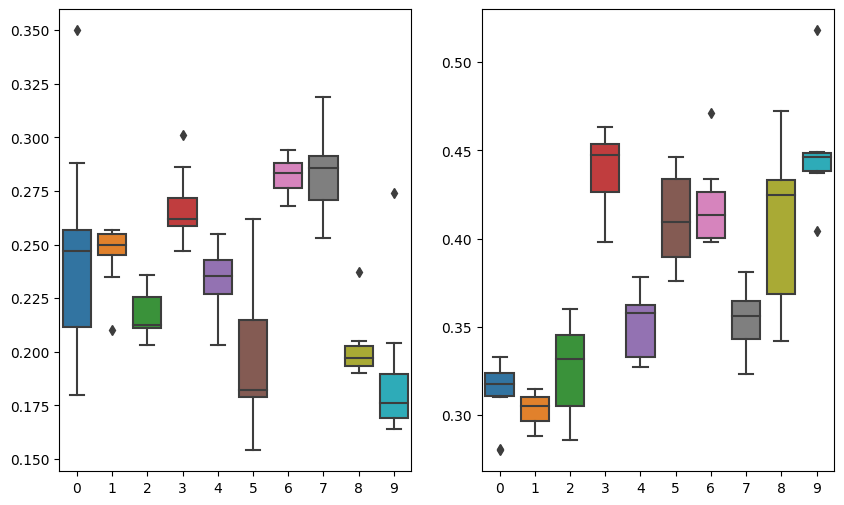

In [4]:
# boxplot of distances 
fig, ax = plt.subplots(1,2,figsize=(10, 6))
sns.boxplot(data_all_25,ax = ax[0])
sns.boxplot(data_all_35, ax = ax[1])
plt.show()
# Fig Capture 
# Performance of participants to locate reference distance of 0.25 m. (left) and 0.35 m. (right) 

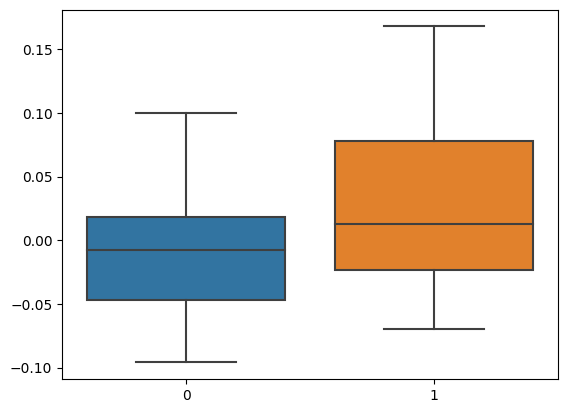

In [5]:
# Processing Exp 1 error  
unpacked_data_25= [] 
unpacked_data_35= [] 

for val in data_all_25:
    unpacked_data_25 += val

for val in data_all_35:
    unpacked_data_35 += val
    
data_all_25 = np.array(unpacked_data_25)
data_all_35 = np.array(unpacked_data_35)
data_25_error = [val - 0.25 for val in data_all_25]
data_35_error = [val - 0.35 for val in data_all_35]
ax = sns.boxplot([data_25_error,data_35_error])
plt.show()

# Fig Capture 
# Errors from all participants to locate reference distance of 0.25 m. (left) and 0.35 m. (right) 

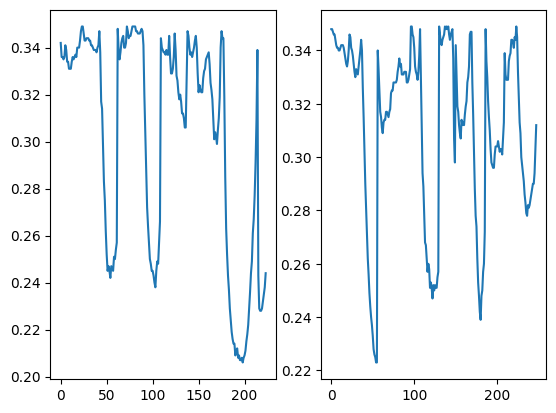

In [7]:
# This cell shows the example of a trial of the experiment 2
data_prop = []
data_vis = []

with open("Main_part/data/exp2/12thApril/Denis_vis.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:  
            data_vis.append(datas) 

with open("Main_part/data/exp2/12thApril/Denis_imp.txt", "r") as my_file:
    for line in my_file:  
        datas = line.split() 
        if float(datas[0]) > 0:
            data_prop.append(datas) 

data_prop = np.array(data_prop, dtype=float)
data_prop = data_prop[data_prop[:,0] < 0.35]

data_vis = np.array(data_vis, dtype=float)
data_vis = data_vis[data_vis[:,0] < 0.35]

fig, ax = plt.subplots(1,2)

x = data_prop[:,0]
peaks, _ = find_peaks(-x, width = 5,height=-0.35)
ax[1].plot(x)
# ax[1].plot(peaks, x[peaks], "x")
prop_peaks = x[peaks]

x = data_vis[:,0]
peaks, _ = find_peaks(-x, width = 5,height=-0.35)
ax[0].plot(x)
# ax[0].plot(peaks, x[peaks], "x")
vis_peaks = x[peaks]
plt.show()

# Этот график визуализирует изменение дистанции по элементам массива
# Fig Capture 
# An Example of the safety distance changes during experiment without our system left and with it (right).    

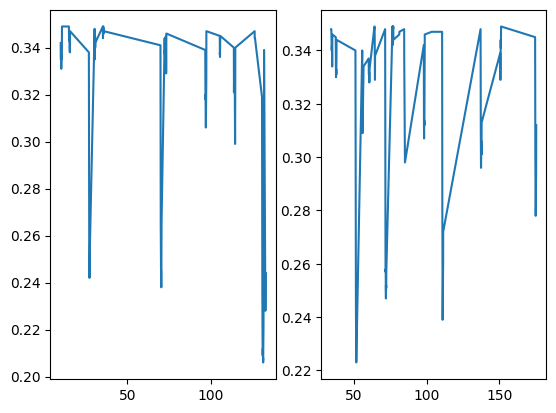

In [8]:
# Честный график (дистанция, время)
fig, ax = plt.subplots(1,2)

x = data_prop[:,0]
peaks, _ = find_peaks(-x, width = 5,height=-0.35)
ax[1].plot(data_prop[:,-1],x)
# ax[1].plot(peaks, x[peaks], "x")
prop_peaks = x[peaks]

x = data_vis[:,0]
peaks, _ = find_peaks(-x, width = 5,height=-0.35)
ax[0].plot(data_vis[:,-1], x)
# ax[0].plot(peaks, x[peaks], "x")
vis_peaks = x[peaks]
plt.show()

In [22]:
def process_file(path_to_file):
    data = []
    with open(path_to_file, "r") as my_file:
        for line in my_file:
            datas = line.split() 
            if float(datas[0]) > 0:  
                data.append(datas) 
    data = np.array(data, dtype=float)
    data = data[data[:,0] < 0.35]
    peaks, _ = find_peaks(-data[:,0], width = 5,height=-0.35)
    peak_values = data[:,0][peaks]
    number_of_crossings = peak_values[peak_values < 0.25].shape[0]

    return data[:,0].tolist(), data[:,0].mean(),peak_values.tolist(), number_of_crossings, peak_values.min(), peak_values.mean()

my_dir = "Main_part/data/exp2/12thApril/"
vis_data = []
prop_data = []
data = []
for file in os.listdir(my_dir):
    if file.endswith(".txt"):
        name_trial = file.split('.')[0].split("_")
        path_to_file = os.path.join(my_dir, file)
        dataset,mean,peak_values, crossings, peaks_min,peaks_mean = process_file(path_to_file)
        used_impeller = name_trial[1] == 'imp'
        peak_values.sort()
        values = [mean]
        if name_trial[1] == 'imp': 
            prop_data+= values
        else:  
            vis_data += values
        data.append([name_trial[0],crossings, peaks_min,peaks_mean, used_impeller])
        
df = pd.DataFrame(data = data, columns= ["name", "crossings", "peaks_min", "peaks_mean", "impeller_used"])

In [25]:
#  The tested data is: 1) the mean distance without impeller (selected only < 0.35 values) 2) with impeller   
print(stats.normaltest(vis_data))
print(stats.normaltest(prop_data))

print(f_oneway(vis_data,prop_data))
# Here wilcoxon test wins 
wilcoxon(vis_data,  prop_data)

# other data results:
# mean distance < 0.4 Wilk /Anova (0.037/0.0648)
# mean distance < 0.45 Wilk /Anova (statistic=0.0, pvalue=0.001953125) /0.011)
# peaks mean - much worse
# peaks min - much worse

NormaltestResult(statistic=0.5193818668290562, pvalue=0.7712899289144618)
NormaltestResult(statistic=0.9151674545454089, pvalue=0.6328108432828905)
F_onewayResult(statistic=4.327492911631506, pvalue=0.052061596478481596)


C:\Users\vikt-\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


WilcoxonResult(statistic=8.0, pvalue=0.048828125)

This study was aimed to evaluate the influence of the designed safety system on maintaining safety distance with the robot.

 The data was analyzed using Wilcoxon signed-rank non-parametric to determine statistically significant differences between error means for two distances, with a chosen significance level of α < 0.05.
 The Wilcoxon results show a significant difference between  significant differences between
the minimum distance with the two feedback modalities    , F(1,..) = 4.98, p = 0.048.

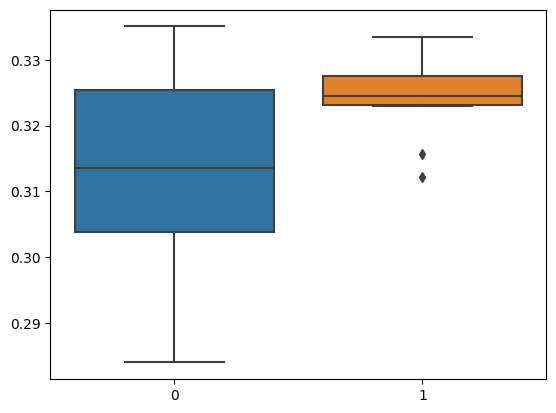

In [26]:
# ax = sns.boxplot([df[df['impeller_used'] == True]["peaks_mean"], df[df['impeller_used'] == False]["peaks_mean"]])
ax = sns.boxplot([vis_data, prop_data])
ax.set_xlabel("")
plt.show()

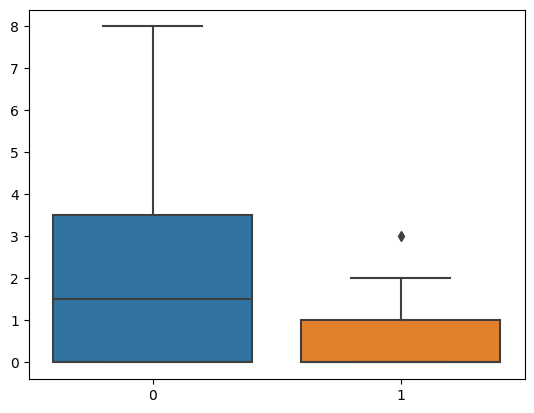

5.374857720023121 0.06805569533418214
4.134599812612647 0.12652695553182375


C:\Users\vikt-\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\vikt-\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\vikt-\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=5.0, pvalue=0.06497778197606971)

In [7]:
crossings_imp = df[df['impeller_used'] == True]["crossings"]
crossings_vis = df[df['impeller_used'] == False]["crossings"]
ax = sns.boxplot([crossings_vis,crossings_imp])
plt.show()

k2, p = stats.normaltest(crossings_imp)
print(k2, p)
k2, p = stats.normaltest(crossings_vis)
print(k2, p)

wilcoxon(crossings_imp,  crossings_vis)

In [30]:
np.array(data_all_vis).shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

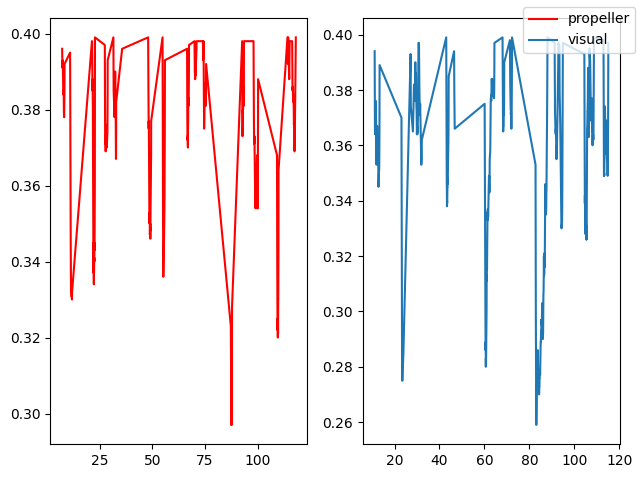

In [38]:
fig, ax = plt.subplots(1,2)
ax[0].plot(data_prop[:,2],data_prop[:,0],'r', label='propeller')
ax[1].plot(data_vis[:,2],data_vis[:,0], label='visual')
fig.tight_layout()
fig.legend()
plt.show()